<a href="https://colab.research.google.com/github/lkj0103/louise/blob/main/%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

class City:
    def __init__(self, name, x, y, accommodation_cost):
        self.name = name
        self.x = x
        self.y = y
        self.accommodation_cost = accommodation_cost

    def calculate_discounted_cost(self, previous_city):
        if previous_city is None:
            return self.accommodation_cost
        else:
            discount = 0.8 if previous_city.name in ['C', 'G'] and self.name == 'A' else 0.8
            return self.accommodation_cost * discount

    def calculate_distance(self, other_city):
        return math.sqrt((self.x - other_city.x) ** 2 + (self.y - other_city.y) ** 2)

def find_cheapest_travel_plan(start_city, cities):
    visited_cities = []
    total_cost = 0

    current_city = start_city
    visited_cities.append(current_city)

    while len(visited_cities) < len(cities):
        min_cost = float('inf')
        next_city = None

        for city in cities:
            if city not in visited_cities:
                distance = current_city.calculate_distance(city)
                cost = distance * 100 + city.calculate_discounted_cost(current_city)
                if cost < min_cost:
                    min_cost = cost
                    next_city = city

        visited_cities.append(next_city)
        total_cost += min_cost
        current_city = next_city

    return visited_cities, total_cost

cities = [
    City('A', 0, 0, 2000),
    City('B', 0, 120, 2400),
    City('C', 30, 100, 2400),
    City('D', 80, 0, 1600),
    City('E', 45, 10, 1500),
    City('F', 90, 160, 2200),
    City('G', 120, 200, 1200)
]

start_city = cities[0]

travel_plan, total_cost = find_cheapest_travel_plan(start_city, cities)

print("Travel Plan:")
for city in travel_plan:
    print(city.name)

print("Total Cost: ", total_cost)

Travel Plan:
A
E
D
C
B
F
G
Total Cost:  46924.57613804574


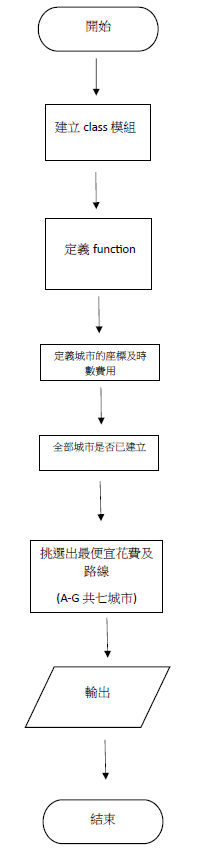